In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("./Root_Insurance_data.csv")

# Modeling Other Advertisers' Bid Strategies

Here, we'll make some assumption about how advertisers generate their bids. 

First, let's assume that the four competing insurance companies generate thier bids at random from identical distributions with some parameters depending on the attributes of the customer. For example, their average bid may be \\$x for a customer who is insured, single, with one driver, and one vehicle, but their average bid could be \\$y for an uninsured, married customer with two drivers and two cars.

There are $36 = 2\times 2\times 3\times 3$ distinct classes of customers, so lets label these classes $i=1,\ldots,36$.

By assuming these bids are identically distributed for each advertiser, we can estimate for each class the probability $ p_i = \mathbb P( \mathrm{ad\,bid} >10 | \mathrm{class}= i)$

Indeed, if $\overline r_i$ is the average observed rank for the customers in class $i$, the maximum likelihood estimate (MLE) for $p_i$ is $$\hat p_{\mathrm{MLE},i} = \frac {\overline r_i - 1} 4$$.

# Modeling via Uniform Distribution

To start, lets assume that the other advertisers' bids are drawn from a uniform distribution with a minimum of \\$$0$ and a maximum of \\$$N$, for some unknown parameter $N$.

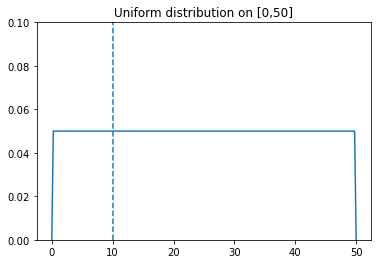

In [3]:
plt.figure()
yvals = [.05 for _ in range(200)]
yvals[0] =0
yvals[-1]=0
plt.plot( np.linspace(0,50,200),yvals )
plt.ylim(0,.1)
plt.vlines(10,0,.1,linestyles="dashed")
plt.title("Uniform distribution on [0,50]")
plt.show()

This is a relatively simple model, but we don't have much information about how much other advertisers are bidding other than that they must bid at least \\$0, and it's perhaps reasonable to speculate that there may be some maximum threshold that advertisers are willing to spend on an ad.

Let $\overline r_i$ be the observed average rank for customers of class $i$ when we place a flat \\$10 bid. Asuming the other advertisers draw from a uniform distribution, the probability their bid is greater than 10 is $$ \mathbb P( \text{ ad bid} > 10 ) = \frac {N-10}N,$$ and the MLE for the maximum bid, $N$, is $$ \hat N_{\mathrm{MLE},i} = \frac {40} {5-\overline r_i}.$$

# MLE Calculations under the Uniform Distribution

For example, among customers with known insurance status and at least two vehicles, our average rank is $\overline r = 4.2$ and corresponds to a max bid of \\$50.20. That is, other advertisers are bidding much more than our \\$10 bid, and so our average rank is quite low.

In [4]:
r = df["rank"].loc[(df["Currently Insured"]!="unknown")&(df["Number of Vehicles"]>=2)].mean()
print("r = ",r)
print("N = ",40/(5-r))

r =  4.203135205747877
N =  50.1967213114754


On the other hand, if we consider customers with unknown insurance status and one or two vehicles, our average rank is $\overline r = 1.7$, corresponding to a max bid of \\$12.06. Here, we would be outbidding our competitors a larger portion of the time.

In [5]:
r = df["rank"].loc[(df["Currently Insured"]=="unknown")&(df["Number of Vehicles"]<=2)].mean()
print("r = ",r)
print("N = ",40/(5-r))

r =  1.6845058264997843
N =  12.064566519135642


If we consider customers with known insurance status and only one vehicle, the average rank is $\overline r = 2.9$, close the middle rank, and the MLE is \\$18.91. A bit larger than our current bid, but not excessively so.

In [6]:
r = df["rank"].loc[(df["Currently Insured"]!="unknown")&(df["Number of Vehicles"]==1)].mean()
print("r = ",r)
print("N = ",40/(5-r))

r =  2.885022026431718
N =  18.91272651530931


# Modeling via Exponential Distribution

Another method to model other advertisers' bids is to use the exponential distribution. This is a useful model since we have little information on competing bids from other advertisers. We know their bids must be positive, but we don't know how large they may be, or what their mean or variance is.

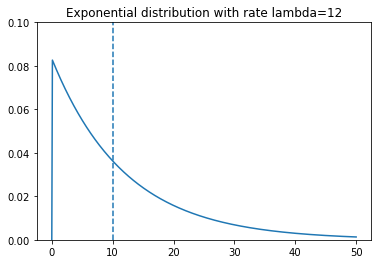

In [7]:
plt.figure()
lm = 12
yvals = [ np.exp(-i/(10*lm))/lm for i in range(500)]
yvals[0] =0
plt.plot( np.linspace(0,50,500),yvals )
plt.ylim(0,.1)
plt.vlines(10,0,.1,linestyles="dashed")
plt.title("Exponential distribution with rate lambda=12")
plt.show()

Exponential distributions tend to be useful when the only information available is the rate at which an event occurs. For one, the exponential minimizes entropy among positive distributions. For example, even the relatively simple uniform distribution discussed in the previous section makes the assumption that there is a maximum possible bid, despite there not being any evidence to believe that's the case.

In practical terms, this means that the exponential should work well under a broad set of real-world circumstances. If we were to acquire more information about the distribution of advertisers' bids, we could include these in the prior assumptions of the model.

Under the exponential distribution with rate $\lambda$, the probability that competitors bid more the \\$10 is $$ \mathbb P(\mathrm{ad\,bid}>10) = e^{-10/\lambda}.$$

The MLE for the rate $\lambda$ can be determined from the MLE for $\mathbb P(\mathrm{ad\,bid}>10)$. If $\overline r_i$ is the average rank observed for customers in class $i$, the maximum likelihood estimate of the rate $\lambda$ is $$\hat \lambda_{\mathrm{MLE},i} = \frac {-10} {\log \big( \frac{\overline r_i - 1}{4} \big)}$$.

# MLE Estimates under Exponential Distribution

For example, among customers with known insurance status and at least two vehicles, the average rank $\overline r$ = 4.2 corresponds to a rate parameter of $\hat\lambda_{\mathrm{MLE}}=$\\$45.01, so other advertisers are outbidding us by a lot.

In [8]:
r = df["rank"].loc[(df["Currently Insured"]!="unknown")&(df["Number of Vehicles"]>=2)].mean()
print("r = ",r)
print("rate = ",-10/np.log((r-1)/4))

r =  4.203135205747877
rate =  45.011736530017885


On the other hand, if we consider customers with unknown insurance status and one or two vehicles, the average rank $\overline r = 1.7$ corresponds to a rate parameter of $\lambda=$\\$5.66, and we are consistently overbidding for customers.

In [9]:
r = df["rank"].loc[(df["Currently Insured"]=="unknown")&(df["Number of Vehicles"]<=2)].mean()
print("r = ",r)
print("rate = ",-10/np.log((r-1)/4))

r =  1.6845058264997843
rate =  5.66459111949206


And finally for customers with known insurance status and only one vehicle, the average rank $\overline r=2.9$ corresponds to a rate parameter of \\$13.29. Which again indicates that other advertisers' bids are typically comparable to the \\$10 bid.

In [10]:
r = df["rank"].loc[(df["Currently Insured"]!="unknown")&(df["Number of Vehicles"]==1)].mean()
print("r = ",r)
print("rate = ",-10/np.log((r-1)/4))

r =  2.885022026431718
rate =  13.291600275015378


# Hybrid Model

Our final model, and the one we will ultimately use to optimize the bid strategy is a hybrid of the uniform and exponential models. Specifically, the data allows us to estimate $\mathbb P(X> 10)$ and $\mathbb P(X \leq 10)$ for $X$ a positive random variable determining the bid of a given advertiser.

For values of $X<10$, we model the distribution of ads as a uniform distribution on $[0,10]$, and for values $X>10$ we model the distribution of bids as a distribution with exponentially decaying tails, with the condition that the probability distribution is continuous.

Thus the probability distribution is of the form $$f(x) = \begin{cases} \frac {1-p}{10} & \text{for } 0\leq x\leq10 \\ \frac p \lambda e^{-(x-10)/\lambda} & \text{for }10<x.\end{cases} $$

where
$$ p = \mathbb P(X>10)$$ and $$\lambda = 10 \frac p {1-p}.$$

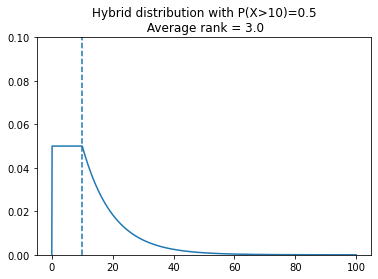

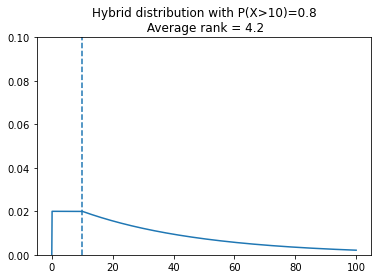

In [25]:
plt.figure()
lm = 12
yvals = [ .05 for i in range(100)] + [ .05*np.exp(-i/(100)) for i in range(900) ]
yvals[0] =0
plt.plot( np.linspace(0,100,1000),yvals )
plt.ylim(0,.1)
plt.vlines(10,0,.1,linestyles="dashed")
plt.title("Hybrid distribution with P(X>10)=0.5\n Average rank = 3.0")
plt.show()

plt.figure()
yvals = [ .02 for i in range(100)] + [ .02*np.exp(-i/(400)) for i in range(900) ]
yvals[0] =0
plt.plot( np.linspace(0,100,1000),yvals )
plt.ylim(0,.1)
plt.vlines(10,0,.1,linestyles="dashed")
plt.title("Hybrid distribution with P(X>10)=0.8\n Average rank = 4.2")
plt.show()

In fact, this distribution maximizes the entropy functional among continuous distributions with fixed probability $\mathbb P(X>10)$, so in a sense it assumes the "least" about the shape of the true distribution, and as a result it should be applicable under circumstances where we cannot estimate, for example, the mean or variance of the true distributions. If more properties become known at a later time, they can be added to improve the fit of the model.

Given the MLE estimate of $\mathbb P(X>10)$ is $\hat p_{\mathrm{MLE}} = \frac {\overline r - 1} 4$, the rate at which the exponential tails decay is $$\lambda = \frac {10 p} {1-p} = 10 \Big( \frac {\overline r - 1}{5 - \overline r} \Big)$$ as determined by $\hat p_{\mathrm{MLE}}$.

# How does bid strategy ultimately affect cost per policy sold?

Now, let's consider a single customer whose characteristics are known (insurance status, marital status, number of drivers, and number of vehicles). We need to determine an optimal dollar amount $b$ to bid on an ad for this customer.

Our bid will determine our place in the ad rankings, and we'll use the exponential distribution to model the other advertisers bids based on the average ranking for a flat \\$10 bid. If $\overline r$ is the average rank for customers of this type, so that $$\hat p_{\mathrm{MLE}}= \frac {\overline r - 1} 4$$ is the MLE of $\mathbb P(X>10)$, then the probability that our bid is $\mathrm{rank}=r$ is $$\mathbb P(\mathrm{rank}=r | \mathrm{bid}=b) = \binom 4 {r-1} \big(\mathbb P(X\leq b) \big)^{r-1} \big( \mathbb P(X>b)\big)^{5-r}.$$

If our ad is at rank $r$ in the rankings, we can estimate the chance that that a customer will click our ad, $\mathbb P( \mathrm{click} | \mathrm{rank}=r)$. A higher bid will result in a higher rank, on average, and we have seen that higher ranked ads get clicked much more frequently than lower ranked ads. These click rates don't seem to depend on the characteristic of the customer, so we'll take them to be same for all customers $$\mathbb P( \mathrm{click} | \mathrm{rank}=r) = \theta_r.$$

Finally, using the customer characteristics, we can estimate the probability of selling a policy when the customer clicks our ad, $\mathbb P( \mathrm{buy} | \mathrm{click})$, using the logistic regression from above.

Thus can estimate the probability of selling a policy based on the bid size: $$\mathbb P(\mathrm{buy} | \mathrm{bid}=b) = \mathbb P(\mathrm{buy}|\mathrm{click})\times\mathbb P(\mathrm{click}|\mathrm{bid}=b) $$
$$\mathbb P(\mathrm{buy} | \mathrm{bid}=b) = \mathbb P( \mathrm{buy} | \mathrm{click}) \sum_{r=1}^5 \mathbb P( \mathrm{click} | \mathrm{rank}=r) \times\mathbb P(\mathrm{rank}=r | \mathrm{bid}=b),$$

$$\mathbb P(\mathrm{buy} | \mathrm{bid}=b) = \mathbb P( \mathrm{buy} | \mathrm{click}) \sum_{r=1}^5 \theta_r \binom 4 {r-1} \big(\mathbb P(X\leq b) \big)^{r-1} \big( \mathbb P(X>b)\big)^{5-r}.$$


# Assessing the Efficiency of a Bid Strategy

The goal for developing a bid strategy is to maximize the efficiency of the advertising budget, while selling at least 400 total policies. Equivalently, we can minimize the cost per policy sold.

Thus we need to estimate the total number of policies sold for a given bid strategy, the expected cost of the bid strategy, and ultimately the cost per customer acquisition.

There are 36 possible combinations of customer characteristics. Label these from 1 to 36, and suppose that out of $N=10,000$ customers in the future we end up with $N_i$ potential customers in each class $i$ for $i=1,\ldots,36$. These are random quantities, but we have some idea of the proportion they make up from the 10,000 data points collected so far.

From the data, we have an estimate of $q_i$, the probability of a customer in class $i$ to buy a policy; $\hat p_{\mathrm{MLE}}$, the probability that advertisers bid greater than \\$10; and $\theta_r$ the rate of expected clicks for ads at rank=$r$.

Suppose we propose a bid strategy where we always bid $b_i$ dollars for customer of type $i$. Then we can calcuate the expected number of policies sold:
$$ \mathbb E [ \mathrm{\,\#policies\,\,sold\,} ]  =\sum_{i=1}^{36} \sum_{r=1}^5 N_i q_i \theta_r \binom{4}{r-1} \big(\mathbb P(X>10) \big)^{r-1}  \big(\mathbb P(X\leq 10) \big)^{5-r} $$

We have to pay for our bid only if our ad is clicked, so we can also estimate the total expenses as
$$ \mathbb E[ \mathrm{Cost} ] = \sum_{i=1}^{36} \sum_{r=1}^5 b_i N_i \theta_r \binom 4 {r-1} \big(\mathbb P(X>10)\big)^{r-1}  \big(\mathbb P(X\leq 10) \big)^{5-r}.$$



The question of maximizing efficiency can now be posed as a constrained optimization problem: Find
$$ \underset {b_i\geq 0} {\arg\,\min\,} \mathcal L(b_1,\ldots,b_{36})$$
where
$$ \mathcal L(b_1,\ldots,b_{36}) = \frac {\mathbb E [\mathrm{Cost}]}{\mathbb E[ \mathrm{\# policies\,sold\,}]} = \frac  {\sum_{i=1}^{36} \sum_{r=1}^5 b_i N_i \theta_r \binom 4 {r-1} \big(\mathbb P(X> 10) \big)^{r-1}  \big(\mathbb P(X\leq 10) \big)^{5-r}}{\sum_{i=1}^{36} \sum_{r=1}^5 N_i p_i \theta_r \binom{4}{r-1} \big(\mathbb P(X> 10) \big)^{r-1}  \big(\mathbb P(X\leq 10) \big)^{5-r}} $$
subject to the constraint
$$ \mathbb E[ \mathrm{\# policies\,sold\,}] =  \sum_{i=1}^{36} \sum_{r=1}^5 N_i p_i \theta_r \binom{4}{r-1} \big(\mathbb P(X> 10) \big)^{r-1}  \big(\mathbb P(X\leq 10) \big)^{5-r} \geq 400. $$

(Strictly, this constraint says the *expected* number of policies is at least 400. If we want, for example, 95\% confidence that the true number of policies will be at least 400, we can increase the lower bound appropriately using a variance estimate).